# データの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
#CSVデータの読み込み
df = pd.read_csv('housing.csv')

In [6]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布の確認

In [7]:
import seaborn as sns

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


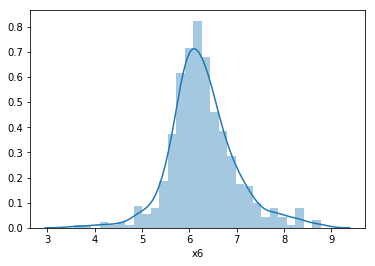

In [10]:
sns.distplot(df['x6'])

In [17]:
col = 'x6'

In [18]:
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [20]:
# 平均
mean[col]
# mean

6.284634387351788

In [23]:
#　標準偏差（standard deviation）
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [24]:
sigma[col]

0.7026171434153234

In [26]:
# -3σ
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [28]:
# ＋3σ
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [32]:
df2 = df[(df[col] > low) & (df[col] < high)]

In [33]:
len(df)

506

In [34]:
len(df2)

498

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


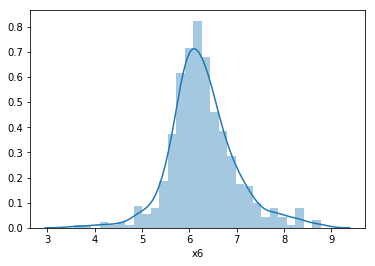

In [36]:
# 分布の確認
sns.distplot(df['x6']) #オリジナル

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


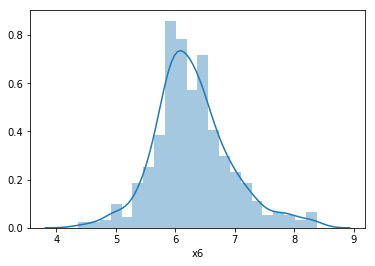

In [37]:
sns.distplot(df2['x6'])

In [39]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [43]:
_df = df
for col in cols:
    #３σ法の上下限値を設定
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    # 条件での絞込み
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [44]:
# オリジナル
len(df)

506

In [45]:
# 3σ法適用後
len(_df)

415

サンプルが減る場合の対処法
・外れ値は取り除く
・外れ値を平均もしくは中央値などで埋める
・主成分分析等を使って、潜在変数に変換した後に３σ法を適応　（高度）

# 入力変数と出力変数に分割

In [46]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [60]:
# df.iloc[行、列]
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]

# 訓練データと検証データに分割

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,random_state=1)

# 重回帰分析

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
#　モデルを宣言
model = LinearRegression()

In [65]:
# モデルの学習
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
#　検証　（訓練データ）
model.score(X_train,y_train)

0.7972109224535133

In [67]:
#　検証　（検証データ）
model.score(X_test,y_test)

0.6253776004329592

In [68]:
# 過学習（オーバーフィッティング）

# スケーリング

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
# scaler 宣言

In [71]:
scaler = StandardScaler()

In [73]:
# scalerの学習　（平均と標準偏差を計算
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [82]:
#　モデルの宣言
model = LinearRegression()

In [83]:
model.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
# 検証　（訓練データ）
model.score(X_train2, y_train)

0.7972109224535133

In [86]:
# 検証　（検証データ）
model.score(X_test2, y_test)

0.6253776004329598

In [91]:
#　重みの確認
model.coef_

array([-0.2 ,  0.21,  0.51, -0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

In [90]:
np.set_printoptions(precision=2, suppress=True)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


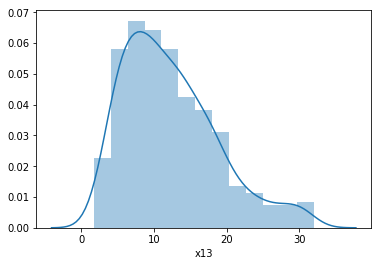

In [95]:
sns.distplot(_df['x13'])　#外れ値除去後_df